In [1]:
import xarray as xr
import numpy as np

In [2]:
from matplotlib.patches import Rectangle

In [3]:
import matplotlib.ticker as mticker

In [4]:
from plot_config import *

In [5]:
from utils import *

In [6]:
xg = np.load('plotting_xg.npy')
yg = np.load('plotting_yg.npy')

In [7]:
ecco_grid = xr.open_zarr('~/ECCO_transport')

/home/wjiang33/miniconda3/envs/bubblebath/lib/python3.12/site-packages/gribapi/__init__.py:23: UserWarning: ecCodes 2.38.0 or higher is recommended. You are running version 2.23.0
  warnings.warn(


In [8]:
for fc in [6,7]:

    discontinue_face = xg[fc]<0
    xg[fc][discontinue_face]+=360

In [9]:
projection = ccrs.Stereographic(central_longitude=-40.0)

In [10]:
vmax = 50
def plot2d(sp,ax = None,vmax = vmax,title = False, hash_type = 'wholedepth',save_as  =False,extent = extent,ind = 0,subplot_offset = -0.12,fontsize = 7):
    # extent = (-95, 15, -10, 90)
    n = 20
    if hash_type == 'wholedepth':
        # pass
        ct = maps['count'].sum(axis = 0)/2
    else:
        ct = maps['count'][0]/2
    condition = np.logical_and(True, ct<5e3)
    to_plot = sp*VOLUME_EACH/ecco_grid.rA
    zm = np.ma.masked_where(condition,to_plot)
    for i in [1,2,6,7,10,11]:
        p2 = ax.pcolormesh(xg[i] ,yg[i] ,to_plot[i] ,vmax = vmax,vmin = -vmax,cmap = balance, transform = ccrs.PlateCarree(),linewidth=0,rasterized=True)
        p2.set_edgecolor('face')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    ax.add_patch(Rectangle((xlim[0], ylim[0]), xlim[1]-xlim[0], ylim[1]-ylim[0], fill=False, hatch='..'))
    for i in [1,2,6,7,10,11]:
        p2 = ax.pcolormesh(xg[i] ,yg[i] ,zm[i] ,vmax = vmax,vmin = -vmax,cmap = balance, transform = ccrs.PlateCarree(),linewidth=0,rasterized=True)
        p2.set_edgecolor('face')
    ax.add_feature(cfeature.LAND, zorder=9, facecolor='grey')
    cbar = plt.colorbar(p2,extend = 'both')
    cbar.ax.set_ylabel(r'$psu\cdot m$', fontsize=fontsize,va = 'center')
    
    ax.set_extent([-90,0,88,10],crs = ccrs.PlateCarree())
    if title:
        ax.set_title(title,fontsize = fontsize)
        ax.set_title('('+chr(97+ind)+')',loc = 'left',x = subplot_offset,fontsize = fontsize)
    gl = ax.gridlines(draw_labels={"bottom": "x", "left": "y"}, linestyle="--", linewidth=0.5,zorder = 10)
    gl.xlocator = mticker.FixedLocator(np.arange(-4,1)*20)
    gl.y_inline = False
    # gl.x_inline = False
    gl.xlabel_style = {"fontsize": 5}
    gl.ylabel_style = {"fontsize": 5}

In [11]:
mm = 1/25.4

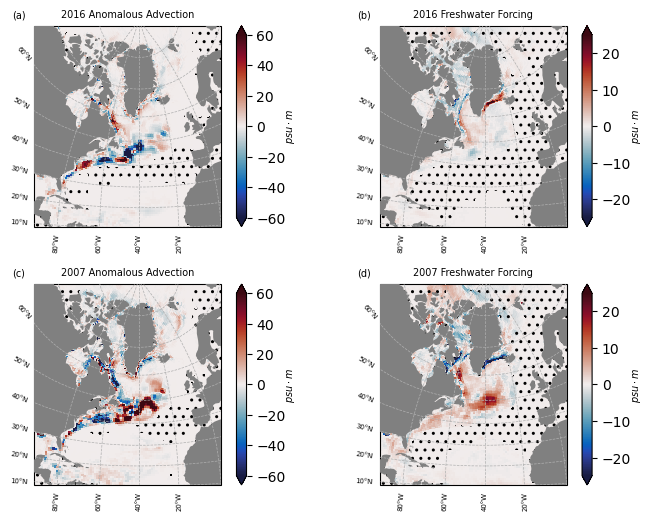

In [12]:
i = 0
fig = plt.figure(figsize = (180*mm,135*mm))
axs = [plt.subplot(2,2,i+1,projection = projection) for i in range(4)]
for case in ['fresh','salty']:
    maps,table = open_case(case)
    if case == 'salty':
        TOTAL_VOLUME,NUMBER_OF_PARTICLE,VOLUME_EACH,idate = TOTAL_VOLUME_salty,NUMBER_OF_PARTICLE_salty,VOLUME_EACH_salty,salty_idate
        year = '2007'
    if case == 'fresh':
        TOTAL_VOLUME,NUMBER_OF_PARTICLE,VOLUME_EACH,idate = TOTAL_VOLUME_fresh,NUMBER_OF_PARTICLE_fresh,VOLUME_EACH_fresh,fresh_idate
        year = '2016'
    
    for var in ['A','F']:
        if var == 'F':
            vmax = 25
            hashtype = 'surface'
        else:
            vmax = 60
            hashtype = 'wholedepth'
        plot2d(-maps[var].sum(dim = 'Z'),ax = axs[i],vmax = vmax,title = year+' '+case_term_dic[var],hash_type = hashtype,ind = i)
        i+=1
plt.tight_layout()
plt.savefig('ng_fig2.pdf', format="pdf",dpi = 400)

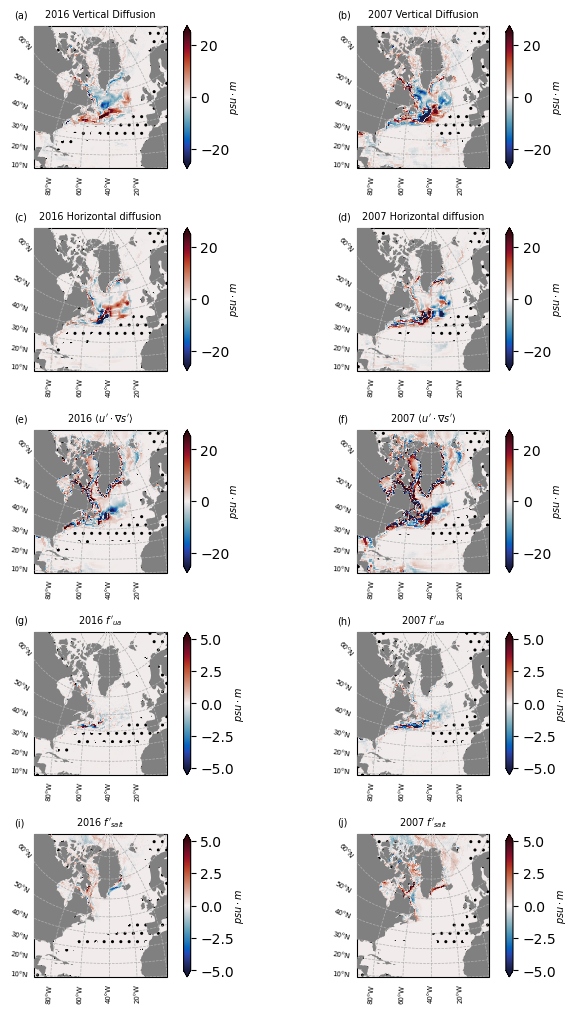

In [13]:
i = 0
fig = plt.figure(figsize = (180*mm,260*mm))
axs = [plt.subplot(5,2,i+1, projection = projection) for i in range(10)]
# axs = axs.ravel()
    
for var in ['dif_v', 'dif_h', 'E', 'e_ua', 'I']:
    vmax = 25
    hashtype = 'wholedepth'
    if var in ['I','e_ua']:
        vmax = 5
    for case in ['fresh','salty']:
        maps,table = open_case(case)
        if case == 'salty':
            TOTAL_VOLUME,NUMBER_OF_PARTICLE,VOLUME_EACH,idate = TOTAL_VOLUME_salty,NUMBER_OF_PARTICLE_salty,VOLUME_EACH_salty,salty_idate
            year = '2007'
        if case == 'fresh':
            TOTAL_VOLUME,NUMBER_OF_PARTICLE,VOLUME_EACH,idate = TOTAL_VOLUME_fresh,NUMBER_OF_PARTICLE_fresh,VOLUME_EACH_fresh,fresh_idate
            year = '2016'
        plot2d(-maps[var].sum(dim = 'Z'),ax = axs[i],vmax = vmax,title = year+' '+case_term_dic[var],hash_type = hashtype,
               ind = i,subplot_offset = -0.15)
        i+=1
plt.tight_layout()
plt.savefig('weak_contr_map.pdf', format="pdf",dpi = 300)